# Visualisation Notebook
This notebook will take in all models, and return the train/test scores, while showing a plot of predicted vs experimental HLCs

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import mpld3
mpld3.disable_notebook()
import os
import ipywidgets as widgets
from IPython.display import display
import joblib

In [2]:
def prediction_plot_scores(model_func, pred_df, features_list):
    """Print train+test scores, then plot scatter of predicted vs actual HLCs. Uses {X/y}_{train/test},
    redefining these variables will change the output."""
    print('Training Score:\t', model_func.score(X_train[features_list], y_train))
    print('Testing Score:\t', model_func.score(X_test[features_list], y_test))
    fig = plt.figure(figsize=(10, 10))
    scatter = plt.scatter(pred_df['Experimental'], pred_df['Predicted'])
    plt.xlabel('Experimental')
    plt.ylabel('Predicted')
    plt.title('%s predictions of HLCs' %str(model_func).split(sep='(')[0])
    labels = ['{}'.format(i) for i in species_names]
    tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
    mpld3.plugins.connect(fig, tooltip)
    plt.plot([-30, 10], [-30, 10], c='red')
    plt.show()

# Set up function to view all models
## Dict containing sets of models, with dataset types as keys

In [3]:
path_dict = {} #dict holding each dataset type as keys, and lists of model set dirs as values.
for dataset in os.listdir("../HLCPredictor_Models/"):
    path_list = []
    for i in range(1, 4):
        set_n = "set_" + str(i)
        path_list.append("../HLCPredictor_Models/%s/%s/"%(dataset, set_n))
    path_dict.update({dataset:path_list})
display(path_dict)

{'DRAGON_noVPAS': ['../HLCPredictor_Models/DRAGON_noVPAS/set_1/',
  '../HLCPredictor_Models/DRAGON_noVPAS/set_2/',
  '../HLCPredictor_Models/DRAGON_noVPAS/set_3/'],
 'DRAGON_VPAS': ['../HLCPredictor_Models/DRAGON_VPAS/set_1/',
  '../HLCPredictor_Models/DRAGON_VPAS/set_2/',
  '../HLCPredictor_Models/DRAGON_VPAS/set_3/'],
 'PCA_DRAGON_noVPAS': ['../HLCPredictor_Models/PCA_DRAGON_noVPAS/set_1/',
  '../HLCPredictor_Models/PCA_DRAGON_noVPAS/set_2/',
  '../HLCPredictor_Models/PCA_DRAGON_noVPAS/set_3/'],
 'PCA_DRAGON_VPAS': ['../HLCPredictor_Models/PCA_DRAGON_VPAS/set_1/',
  '../HLCPredictor_Models/PCA_DRAGON_VPAS/set_2/',
  '../HLCPredictor_Models/PCA_DRAGON_VPAS/set_3/'],
 'RDKit_noVPAS': ['../HLCPredictor_Models/RDKit_noVPAS/set_1/',
  '../HLCPredictor_Models/RDKit_noVPAS/set_2/',
  '../HLCPredictor_Models/RDKit_noVPAS/set_3/'],
 'RDKit_VPAS': ['../HLCPredictor_Models/RDKit_VPAS/set_1/',
  '../HLCPredictor_Models/RDKit_VPAS/set_2/',
  '../HLCPredictor_Models/RDKit_VPAS/set_3/']}

## Creating file path lists

In [4]:
for dataset in path_dict:
    for i in range(0, len(path_dict[dataset])):
        file_path = path_dict[dataset][i]
        exec('paths_%s = []'%dataset)
        exec('%s_model_list_%s = []'%(dataset, str(i)))
        exec('%s_importances_list_%s = []'%(dataset, str(i)))
        exec('%s_train_test_list_%s = []'%(dataset, str(i)))
        for file in os.listdir(file_path):
            if '.' in file:
                if file.split(sep='.')[1] == 'joblib':
                    if 'importances' in file:
                        eval('%s_importances_list_%s.append(file_path + file)'%(dataset, str(i)))
                    else:
                        eval('%s_model_list_%s.append(file_path + file)'%(dataset, str(i)))
            if 'csv' in file:
                eval('%s_train_test_list_%s.append(file_path + file)'%(dataset, str(i)))
    
for file_list in dir():
    if file_list[0:13] == 'DRAGON_noVPAS':
        paths_DRAGON_noVPAS.append(file_list)
    if file_list[0:11] == 'DRAGON_VPAS':
        paths_DRAGON_VPAS.append(file_list)
    if file_list[0:17] == 'PCA_DRAGON_noVPAS':
        paths_PCA_DRAGON_noVPAS.append(file_list)
    if file_list[0:15] == 'PCA_DRAGON_VPAS':
        paths_PCA_DRAGON_VPAS.append(file_list)
    if file_list[0:10] == 'RDKit_VPAS':
        paths_RDKit_VPAS.append(file_list)
    if file_list[0:12] == 'RDKit_noVPAS':
        paths_RDKit_noVPAS.append(file_list)

In [5]:
paths_RDKit_noVPAS

['RDKit_noVPAS_importances_list_0',
 'RDKit_noVPAS_importances_list_1',
 'RDKit_noVPAS_importances_list_2',
 'RDKit_noVPAS_model_list_0',
 'RDKit_noVPAS_model_list_1',
 'RDKit_noVPAS_model_list_2',
 'RDKit_noVPAS_train_test_list_0',
 'RDKit_noVPAS_train_test_list_1',
 'RDKit_noVPAS_train_test_list_2']

In [6]:
RDKit_noVPAS_importances_list_0

['../HLCPredictor_Models/RDKit_noVPAS/set_1/freg_importances.joblib',
 '../HLCPredictor_Models/RDKit_noVPAS/set_1/lasso_importances.joblib',
 '../HLCPredictor_Models/RDKit_noVPAS/set_1/model_importances.joblib',
 '../HLCPredictor_Models/RDKit_noVPAS/set_1/mutual_importances.joblib']

## Loading files into this session

In [7]:
for dataset in path_dict:
    for file_list in eval('paths_%s'%dataset):
        file_path_list = (eval(file_list))
        for file in file_path_list:
            filename = (file.split(sep='/')[4])
            set_n = (file.split(sep='/')[3])
            if not 'importances' in filename:
                print(filename, "\n\t", file, set_n)
                if not 'csv' in filename:
                    if not 'pca_fit' in filename:
                        model = (filename.split(sep='_')[0])
                        features = filename.split(sep='_')[1]
                        #print('%s_%s_%s_%s = joblib.load(file)'%(dataset, model, features, set_n), "\n\t", file)
                        exec('%s_%s_%s_%s = joblib.load(file)'%(dataset, model, features, set_n))
            if 'importances' in filename:
                #print(filename, set_n, "\n", file)
                imp_type = filename.split(sep='_')[0]
                exec('%s_importances_%s_%s = joblib.load(file)'%(dataset, imp_type, set_n))
            if 'csv' in filename:
                data_type = (filename.split(sep='.')[0])
                if 'X' in filename:
                    exec('%s_data_%s_%s = pd.read_csv(file)'%(dataset, data_type, set_n))
                if 'y' in filename:
                    exec('%s_data_%s_%s = pd.read_csv(file, header=None)'%(dataset, data_type, set_n))
                    exec('%s_data_%s_%s.drop(0, axis=1, inplace=True)'%(dataset, data_type, set_n))
            if 'pca_fit' in filename:
                data_type = filename.split(sep='.')[0]
                exec('%s_data_%s_%s = joblib.load(file)'%(dataset, data_type, set_n))

AdaBoostRegressor_kbest_22_01_2020_23_15_56.joblib 
	 ../HLCPredictor_Models/DRAGON_noVPAS/set_1/AdaBoostRegressor_kbest_22_01_2020_23_15_56.joblib set_1
AdaBoostRegressor_lasso_22_01_2020_23_17_38.joblib 
	 ../HLCPredictor_Models/DRAGON_noVPAS/set_1/AdaBoostRegressor_lasso_22_01_2020_23_17_38.joblib set_1
AdaBoostRegressor_model_22_01_2020_23_15_05.joblib 
	 ../HLCPredictor_Models/DRAGON_noVPAS/set_1/AdaBoostRegressor_model_22_01_2020_23_15_05.joblib set_1
AdaBoostRegressor_mutual_info_22_01_2020_23_16_47.joblib 
	 ../HLCPredictor_Models/DRAGON_noVPAS/set_1/AdaBoostRegressor_mutual_info_22_01_2020_23_16_47.joblib set_1
DecisionTreeRegressor_kbest_22_01_2020_23_08_02.joblib 
	 ../HLCPredictor_Models/DRAGON_noVPAS/set_1/DecisionTreeRegressor_kbest_22_01_2020_23_08_02.joblib set_1
DecisionTreeRegressor_lasso_22_01_2020_23_08_55.joblib 
	 ../HLCPredictor_Models/DRAGON_noVPAS/set_1/DecisionTreeRegressor_lasso_22_01_2020_23_08_55.joblib set_1
DecisionTreeRegressor_model_22_01_2020_22_47_05.

RandomForestRegressor_lasso_23_01_2020_12_05_59.joblib 
	 ../HLCPredictor_Models/DRAGON_noVPAS/set_2/RandomForestRegressor_lasso_23_01_2020_12_05_59.joblib set_2
RandomForestRegressor_model_23_01_2020_12_04_10.joblib 
	 ../HLCPredictor_Models/DRAGON_noVPAS/set_2/RandomForestRegressor_model_23_01_2020_12_04_10.joblib set_2
RandomForestRegressor_mutual_info_23_01_2020_12_05_23.joblib 
	 ../HLCPredictor_Models/DRAGON_noVPAS/set_2/RandomForestRegressor_mutual_info_23_01_2020_12_05_23.joblib set_2
AdaBoostRegressor_kbest_23_01_2020_13_10_42.joblib 
	 ../HLCPredictor_Models/DRAGON_noVPAS/set_3/AdaBoostRegressor_kbest_23_01_2020_13_10_42.joblib set_3
AdaBoostRegressor_lasso_23_01_2020_13_13_36.joblib 
	 ../HLCPredictor_Models/DRAGON_noVPAS/set_3/AdaBoostRegressor_lasso_23_01_2020_13_13_36.joblib set_3
AdaBoostRegressor_model_23_01_2020_13_09_15.joblib 
	 ../HLCPredictor_Models/DRAGON_noVPAS/set_3/AdaBoostRegressor_model_23_01_2020_13_09_15.joblib set_3
AdaBoostRegressor_mutual_info_23_01_2020

	 ../HLCPredictor_Models/DRAGON_VPAS/set_1/Lasso_lasso_25_01_2020_14_34_41.joblib set_1
Lasso_model_25_01_2020_14_34_34.joblib 
	 ../HLCPredictor_Models/DRAGON_VPAS/set_1/Lasso_model_25_01_2020_14_34_34.joblib set_1
Lasso_mutual_info_25_01_2020_14_34_39.joblib 
	 ../HLCPredictor_Models/DRAGON_VPAS/set_1/Lasso_mutual_info_25_01_2020_14_34_39.joblib set_1
RandomForestRegressor_kbest_25_01_2020_16_29_05.joblib 
	 ../HLCPredictor_Models/DRAGON_VPAS/set_1/RandomForestRegressor_kbest_25_01_2020_16_29_05.joblib set_1
RandomForestRegressor_lasso_25_01_2020_16_29_58.joblib 
	 ../HLCPredictor_Models/DRAGON_VPAS/set_1/RandomForestRegressor_lasso_25_01_2020_16_29_58.joblib set_1
RandomForestRegressor_model_25_01_2020_16_28_38.joblib 
	 ../HLCPredictor_Models/DRAGON_VPAS/set_1/RandomForestRegressor_model_25_01_2020_16_28_38.joblib set_1
RandomForestRegressor_mutual_info_25_01_2020_16_29_31.joblib 
	 ../HLCPredictor_Models/DRAGON_VPAS/set_1/RandomForestRegressor_mutual_info_25_01_2020_16_29_31.jobli

Lasso_mutual_info_25_01_2020_21_26_34.joblib 
	 ../HLCPredictor_Models/DRAGON_VPAS/set_3/Lasso_mutual_info_25_01_2020_21_26_34.joblib set_3
RandomForestRegressor_kbest_25_01_2020_23_32_09.joblib 
	 ../HLCPredictor_Models/DRAGON_VPAS/set_3/RandomForestRegressor_kbest_25_01_2020_23_32_09.joblib set_3
RandomForestRegressor_lasso_25_01_2020_23_33_17.joblib 
	 ../HLCPredictor_Models/DRAGON_VPAS/set_3/RandomForestRegressor_lasso_25_01_2020_23_33_17.joblib set_3
RandomForestRegressor_model_25_01_2020_23_31_36.joblib 
	 ../HLCPredictor_Models/DRAGON_VPAS/set_3/RandomForestRegressor_model_25_01_2020_23_31_36.joblib set_3
RandomForestRegressor_mutual_info_25_01_2020_23_32_43.joblib 
	 ../HLCPredictor_Models/DRAGON_VPAS/set_3/RandomForestRegressor_mutual_info_25_01_2020_23_32_43.joblib set_3
X_test_main.csv 
	 ../HLCPredictor_Models/DRAGON_VPAS/set_1/X_test_main.csv set_1
X_train_main.csv 
	 ../HLCPredictor_Models/DRAGON_VPAS/set_1/X_train_main.csv set_1
y_test.csv 
	 ../HLCPredictor_Models/DRAGO

GradientBoostingRegressor__26_01_2020_03_15_54.joblib 
	 ../HLCPredictor_Models/PCA_DRAGON_VPAS/set_1/GradientBoostingRegressor__26_01_2020_03_15_54.joblib set_1
Lars__26_01_2020_12_58_41.joblib 
	 ../HLCPredictor_Models/PCA_DRAGON_VPAS/set_1/Lars__26_01_2020_12_58_41.joblib set_1
Lasso__26_01_2020_03_44_29.joblib 
	 ../HLCPredictor_Models/PCA_DRAGON_VPAS/set_1/Lasso__26_01_2020_03_44_29.joblib set_1
pca_fit.joblib 
	 ../HLCPredictor_Models/PCA_DRAGON_VPAS/set_1/pca_fit.joblib set_1
RandomForestRegressor__26_01_2020_12_58_25.joblib 
	 ../HLCPredictor_Models/PCA_DRAGON_VPAS/set_1/RandomForestRegressor__26_01_2020_12_58_25.joblib set_1
AdaBoostRegressor__26_01_2020_16_17_46.joblib 
	 ../HLCPredictor_Models/PCA_DRAGON_VPAS/set_2/AdaBoostRegressor__26_01_2020_16_17_46.joblib set_2
DecisionTreeRegressor__26_01_2020_15_54_15.joblib 
	 ../HLCPredictor_Models/PCA_DRAGON_VPAS/set_2/DecisionTreeRegressor__26_01_2020_15_54_15.joblib set_2
ElasticNet__27_01_2020_00_37_56.joblib 
	 ../HLCPredictor_

AdaBoostRegressor_lasso_27_01_2020_23_15_12.joblib 
	 ../HLCPredictor_Models/RDKit_noVPAS/set_2/AdaBoostRegressor_lasso_27_01_2020_23_15_12.joblib set_2
AdaBoostRegressor_model_27_01_2020_23_12_36.joblib 
	 ../HLCPredictor_Models/RDKit_noVPAS/set_2/AdaBoostRegressor_model_27_01_2020_23_12_36.joblib set_2
AdaBoostRegressor_mutual_info_27_01_2020_23_14_20.joblib 
	 ../HLCPredictor_Models/RDKit_noVPAS/set_2/AdaBoostRegressor_mutual_info_27_01_2020_23_14_20.joblib set_2
DecisionTreeRegressor_kbest_27_01_2020_23_05_22.joblib 
	 ../HLCPredictor_Models/RDKit_noVPAS/set_2/DecisionTreeRegressor_kbest_27_01_2020_23_05_22.joblib set_2
DecisionTreeRegressor_lasso_27_01_2020_23_05_28.joblib 
	 ../HLCPredictor_Models/RDKit_noVPAS/set_2/DecisionTreeRegressor_lasso_27_01_2020_23_05_28.joblib set_2
DecisionTreeRegressor_model_27_01_2020_23_05_20.joblib 
	 ../HLCPredictor_Models/RDKit_noVPAS/set_2/DecisionTreeRegressor_model_27_01_2020_23_05_20.joblib set_2
DecisionTreeRegressor_mutual_info_27_01_2020_2

X_test_main.csv 
	 ../HLCPredictor_Models/RDKit_noVPAS/set_1/X_test_main.csv set_1
X_train_main.csv 
	 ../HLCPredictor_Models/RDKit_noVPAS/set_1/X_train_main.csv set_1
y_test.csv 
	 ../HLCPredictor_Models/RDKit_noVPAS/set_1/y_test.csv set_1
y_train.csv 
	 ../HLCPredictor_Models/RDKit_noVPAS/set_1/y_train.csv set_1
X_test_main.csv 
	 ../HLCPredictor_Models/RDKit_noVPAS/set_2/X_test_main.csv set_2
X_train_main.csv 
	 ../HLCPredictor_Models/RDKit_noVPAS/set_2/X_train_main.csv set_2
y_test.csv 
	 ../HLCPredictor_Models/RDKit_noVPAS/set_2/y_test.csv set_2
y_train.csv 
	 ../HLCPredictor_Models/RDKit_noVPAS/set_2/y_train.csv set_2
X_test_main.csv 
	 ../HLCPredictor_Models/RDKit_noVPAS/set_3/X_test_main.csv set_3
X_train_main.csv 
	 ../HLCPredictor_Models/RDKit_noVPAS/set_3/X_train_main.csv set_3
y_test.csv 
	 ../HLCPredictor_Models/RDKit_noVPAS/set_3/y_test.csv set_3
y_train.csv 
	 ../HLCPredictor_Models/RDKit_noVPAS/set_3/y_train.csv set_3
AdaBoostRegressor_kbest_28_01_2020_20_19_05.joblib 


RandomForestRegressor_lasso_29_01_2020_04_32_35.joblib 
	 ../HLCPredictor_Models/RDKit_VPAS/set_2/RandomForestRegressor_lasso_29_01_2020_04_32_35.joblib set_2
RandomForestRegressor_model_29_01_2020_04_22_50.joblib 
	 ../HLCPredictor_Models/RDKit_VPAS/set_2/RandomForestRegressor_model_29_01_2020_04_22_50.joblib set_2
RandomForestRegressor_mutual_info_29_01_2020_04_29_19.joblib 
	 ../HLCPredictor_Models/RDKit_VPAS/set_2/RandomForestRegressor_mutual_info_29_01_2020_04_29_19.joblib set_2
AdaBoostRegressor_kbest_29_01_2020_11_22_36.joblib 
	 ../HLCPredictor_Models/RDKit_VPAS/set_3/AdaBoostRegressor_kbest_29_01_2020_11_22_36.joblib set_3
AdaBoostRegressor_lasso_29_01_2020_11_24_48.joblib 
	 ../HLCPredictor_Models/RDKit_VPAS/set_3/AdaBoostRegressor_lasso_29_01_2020_11_24_48.joblib set_3
AdaBoostRegressor_model_29_01_2020_11_21_28.joblib 
	 ../HLCPredictor_Models/RDKit_VPAS/set_3/AdaBoostRegressor_model_29_01_2020_11_21_28.joblib set_3
AdaBoostRegressor_mutual_info_29_01_2020_11_23_42.joblib 


In [8]:
DRAGON_noVPAS_train_test_list_1

['../HLCPredictor_Models/DRAGON_noVPAS/set_2/X_test_main.csv',
 '../HLCPredictor_Models/DRAGON_noVPAS/set_2/X_train_main.csv',
 '../HLCPredictor_Models/DRAGON_noVPAS/set_2/y_test.csv',
 '../HLCPredictor_Models/DRAGON_noVPAS/set_2/y_train.csv']

In [9]:
model_types = ['GradientBoostingRegressor', 'DecisionTreeRegressor', 
               'ElasticNet', 'AdaBoostRegressor', 
               'Lars', 'Lasso', 'RandomForestRegressor']
dataset_types = ['DRAGON_noVPAS', 'DRAGON_VPAS', 'PCA_DRAGON_noVPAS', 'PCA_DRAGON_VPAS', 'RDKit_VPAS', 'RDKit_noVPAS']
set_n_types = ['set_1', 'set_2', 'set_3']
feature_sets = ['model', 'freg', 'mutual', 'lasso']
feature_model_sets = ['model', 'kbest', 'mutual', 'lasso']
feature_name_link_dict = dict(zip(feature_sets, feature_model_sets))

# Export average train and test scores

In [10]:
ave_train_scores = [] ; ave_test_scores = [] ; ave_model_list = []
for Dataset in dataset_types:
    if 'PCA' in Dataset:
        for Model in model_types:
            set_train_scores = [] ; set_test_scores = []
            for Set in set_n_types:
                i = Set.split(sep='_')[1]
                X_train_ = eval(Dataset + "_data_X_train_" + Set)
                X_train = X_train_.drop('Unnamed: 0', axis=1)
                X_test_ = eval(Dataset + "_data_X_test_" + Set)
                X_test = X_test_.drop('Unnamed: 0', axis=1)
                y_train = eval(Dataset + "_data_" + 'y_train'  + "_" + Set)
                y_test = eval(Dataset + "_data_" + 'y_test'  + "_" + Set)
                model = eval(Dataset + "_" + Model + "__" + Set)
                set_train_scores.append(np.array(model.score(X_train, y_train)))
                set_test_scores.append(np.array(model.score(X_test, y_test)))
            ave_train_scores.append(np.mean(set_train_scores))
            ave_test_scores.append(np.mean(set_test_scores))
            ave_model_list.append(Dataset + "_" + Model)
    if not 'PCA' in Dataset:
        for Model in model_types:
            for feature_set in feature_sets:
                set_train_scores = []; set_test_scores = []
                for Set in set_n_types:
                    #print(Dataset, Model, feature_set, Set)
                    X_train_ = eval(Dataset + "_data_X_train_main_" + Set)
                    X_train = X_train_.drop('Unnamed: 0', axis=1)
                    X_test_ = eval(Dataset + "_data_X_test_main_" + Set)
                    X_test = X_test_.drop('Unnamed: 0', axis=1)
                    y_train = eval(Dataset + "_data_" + 'y_train'  + "_" + Set)
                    y_test = eval(Dataset + "_data_" + 'y_test'  + "_" + Set)
                    model = eval(Dataset + "_" + Model + "_" + feature_name_link_dict[feature_set] + "_" + Set)
                    chosen_features = list(eval(Dataset + "_importances_" + feature_set + "_" + Set).nlargest(15).index.values)
                    set_train_scores.append(model.score(X_train[chosen_features], y_train))
                    set_test_scores.append(model.score(X_test[chosen_features], y_test))
                ave_train_scores.append(np.mean(set_train_scores))
                ave_test_scores.append(np.mean(set_test_scores))
                ave_model_list.append(Dataset + "_" + Model + "_" + feature_set)

#av_models_DRAGON_noVPAS = pd.DataFrame(np.array(ave_model_list[0:28]).reshape(7, 4))
#av_models_DRAGON_VPAS = pd.DataFrame(np.array(ave_model_list[28:56]).reshape(7, 4))
#av_models_PCA_DRAGON_noVPAS = pd.DataFrame(np.array(ave_model_list[56:63]).reshape(7))
#av_models_PCA_DRAGON_VPAS = pd.DataFrame(np.array(ave_model_list[63:70]).reshape(7))
#av_models_RDKit_VPAS = pd.DataFrame(np.array(ave_model_list[70:98]).reshape(7, 4))
#av_models_RDKit_noVPAS = pd.DataFrame(np.array(ave_model_list[98:126]).reshape(7, 4))

av_train_DRAGON_noVPAS = pd.DataFrame(np.array(ave_train_scores[0:28]).reshape(7, 4))
av_train_DRAGON_VPAS = pd.DataFrame(np.array(ave_train_scores[28:56]).reshape(7, 4))
av_train_PCA_DRAGON_noVPAS = pd.DataFrame(np.array(ave_train_scores[56:63]).reshape(7))
av_train_PCA_DRAGON_VPAS = pd.DataFrame(np.array(ave_train_scores[63:70]).reshape(7))
av_train_RDKit_VPAS = pd.DataFrame(np.array(ave_train_scores[70:98]).reshape(7, 4))
av_train_RDKit_noVPAS = pd.DataFrame(np.array(ave_train_scores[98:126]).reshape(7, 4))

av_test_DRAGON_noVPAS = pd.DataFrame(np.array(ave_test_scores[0:28]).reshape(7, 4))
av_test_DRAGON_VPAS = pd.DataFrame(np.array(ave_test_scores[28:56]).reshape(7, 4))
av_test_PCA_DRAGON_noVPAS = pd.DataFrame(np.array(ave_test_scores[56:63]).reshape(7))
av_test_PCA_DRAGON_VPAS = pd.DataFrame(np.array(ave_test_scores[63:70]).reshape(7))
av_test_RDKit_VPAS = pd.DataFrame(np.array(ave_test_scores[70:98]).reshape(7, 4))
av_test_RDKit_noVPAS = pd.DataFrame(np.array(ave_test_scores[98:126]).reshape(7, 4))

for obj in dir():
    if obj[0:9] == 'av_models':
        df = eval(obj)
        df.rename({0:'GradientBoostingRegressor',
                   1:'DecisionTreeRegressor',
                   2:'ElasticNet',
                   3:'AdaBoostRegressor',
                   4:'Lars',
                   5:'Lasso',
                   6:'RandomForestRegressor'}, inplace=True)
        if not 'PCA' in obj:
            df.rename({0:'Model', 1:'F-regression', 2:'Mutual Information', 3:'Lasso'}, inplace=True, axis=1)
        else:
            df.rename({0:'PCA'}, axis=1, inplace=True)
    if obj[0:8] == 'av_train':
        df = eval(obj)
        df.rename({0:'GradientBoostingRegressor',
                   1:'DecisionTreeRegressor',
                   2:'ElasticNet',
                   3:'AdaBoostRegressor',
                   4:'Lars',
                   5:'Lasso',
                   6:'RandomForestRegressor'}, inplace=True)
        if not 'PCA' in obj:
            df.rename({0:'Model', 1:'F-regression', 2:'Mutual Information', 3:'Lasso'}, inplace=True, axis=1)
        else:
            df.rename({0:'PCA'}, axis=1, inplace=True)
        diss_df = df.round(3)
        diss_df.to_csv('diss_scores/%s.csv'%obj)
        df.to_csv('scores/%s.csv'%obj)
    if obj[0:7] == 'av_test':
        df = eval(obj)
        df.rename({0:'GradientBoostingRegressor',
                   1:'DecisionTreeRegressor',
                   2:'ElasticNet',
                   3:'AdaBoostRegressor',
                   4:'Lars',
                   5:'Lasso',
                   6:'RandomForestRegressor'}, inplace=True)
        if not 'PCA' in obj:
            df.rename({0:'Model', 1:'F-regression', 2:'Mutual Information', 3:'Lasso'}, inplace=True, axis=1)
        else:
            df.rename({0:'PCA'}, axis=1, inplace=True)
        diss_df = df.round(3)
        diss_df.to_csv('diss_scores/%s.csv'%obj)
        df.to_csv('scores/%s.csv'%obj)

In [11]:
for Dataset in dataset_types:
    for obj in dir():
        if Dataset in obj:
            if obj.endswith("train_" + Dataset):
                df_train = eval(obj)
            if obj.endswith("test_" + Dataset):
                df_test = eval(obj)
    exec("train_test_scores_%s = pd.concat([av_train_%s, av_test_%s], axis=1, keys=['Train', 'Test'])"%(Dataset, Dataset, Dataset))

# Widget

In [12]:
@widgets.interact()
def show_model(Dataset = dataset_types,
               Model = model_types,
               Features = feature_sets,
              Show_Features = False):
    widget_av_train = eval("train_test_scores_" + Dataset)
    display(widget_av_train)
    fig, axs = plt.subplots(2, 4, figsize=(20, 10))
    ax_num = 1
    if 'PCA' in Dataset:
        X_train_holder = 'X_train'
        X_test_holder = 'X_test'
        Features = 'PCA'
        
        for Set in set_n_types:
            X_train_ = eval(Dataset + "_data_" + X_train_holder  + "_" + Set)
            X_train = X_train_.drop('Unnamed: 0', axis=1)
            X_test_ = eval(Dataset + "_data_" + X_test_holder  + "_" + Set)
            X_test = X_test_.drop('Unnamed: 0', axis=1)
            y_train = eval(Dataset + "_data_" + 'y_train'  + "_" + Set)
            y_test = eval(Dataset + "_data_" + 'y_test'  + "_" + Set)
            chosen_model = eval(Dataset + "_" + Model + "__" + Set)
            train_predictions = chosen_model.predict(X_train)
            test_predictions = chosen_model.predict(X_test)
            axs[0, ax_num].scatter(y_train, train_predictions, s=3, c='b')
            axs[0, ax_num].set_title(Set)
            axs[0, ax_num].set_xlabel('Expected log($K_H$)')
            axs[0, ax_num].set_ylabel('Predicted log($K_H$)')
            axs[1, ax_num].scatter(y_test, test_predictions, s=3, c='r')
            axs[1, ax_num].set_xlabel('Expected log($K_H$)')
            axs[1, ax_num].set_ylabel('Predicted log($K_H$)')

            ax_num += 1
        axs[0, 0].text(0.4, 0.4, 'Train data', fontsize=22)
        axs[0, 0].get_xaxis().set_visible(False)
        axs[0, 0].get_yaxis().set_visible(False)
        axs[1, 0].text(0.4, 0.4, 'Test data', fontsize=22)
        axs[1, 0].get_xaxis().set_visible(False)
        axs[1, 0].get_yaxis().set_visible(False)
        
    else:
        X_train_holder = 'X_train_main'
        X_test_holder = 'X_test_main'
        for Set in set_n_types:
            # point widget at correct dataset/model/feature set
            X_train = eval(Dataset + "_data_" + X_train_holder  + "_" + Set)
            X_test = eval(Dataset + "_data_" + X_test_holder  + "_" + Set)
            y_train = eval(Dataset + "_data_" + 'y_train'  + "_" + Set)
            y_test = eval(Dataset + "_data_" + 'y_test'  + "_" + Set)

            chosen_model = eval(Dataset + "_" + Model + "_" + feature_name_link_dict[Features] + "_" + Set)
            feature_set = list(eval(Dataset + "_importances_" + Features + "_" + Set).nlargest(15).index.values)

            # add feature lists as numpy array, then turn into a (3, 5) dataframe
            if Show_Features == True:
                feature_df = pd.DataFrame(np.array(feature_set).reshape(3, 5))
                feature_df.rename({0:'Most Imporant', 1:'', 2:Set, 3:'', 4:'Least Important'},
                                  axis=1, inplace=True)
                exec('feature_df_%s = feature_df'%Set)
            
            
            train_predictions = chosen_model.predict(X_train[feature_set])
            test_predictions = chosen_model.predict(X_test[feature_set])
            axs[0, ax_num].scatter(y_train, train_predictions, s=3, c='b')
            axs[0, ax_num].set_title(Set, fontsize=20)
            axs[0, ax_num].set_xlabel('Expected log($K_H$)')
            axs[0, ax_num].set_ylabel('Predicted log($K_H$)')
            axs[1, ax_num].scatter(y_test, test_predictions, s=3, c='r')
            axs[1, ax_num].set_xlabel('Expected log($K_H$)')
            axs[1, ax_num].set_ylabel('Predicted log($K_H$)')

            ax_num += 1
        axs[0, 0].text(0.4, 0.4, 'Train data', fontsize=22)
        axs[0, 0].get_xaxis().set_visible(False)
        axs[0, 0].get_yaxis().set_visible(False)
        axs[1, 0].text(0.4, 0.4, 'Test data', fontsize=22)
        axs[1, 0].get_xaxis().set_visible(False)
        axs[1, 0].get_yaxis().set_visible(False)
            
    if not 'PCA' in Dataset:
        if Show_Features == True:
            for Set in set_n_types:
                display(eval('feature_df_%s'%Set))
    plt.show()


interactive(children=(Dropdown(description='Dataset', options=('DRAGON_noVPAS', 'DRAGON_VPAS', 'PCA_DRAGON_noV…

non-constant variance - [heteroscatisity](http://www.statsmakemecry.com/smmctheblog/confusing-stats-terms-explained-heteroscedasticity-heteroske.html)
see if any models can deal with non constant variance
comment on growing error with low Kh - limiting factors?

PCA - skree plot of variance covered by components, seems similar to the feature importance graph?

for diss:
- comment on the notebooks themselves, how I've put my UI together etc
- on chemical background, explain important features in some detail - if i can
- when setting context - why are HLCs useful

talk about thermodynamic cycle - solid to gas to solution
 lattice energy, hydration energy etc - must consider crystal 

add supp. material containing datasets and notebooks
 
future work - look into solubility data, construct a cycle of solubilty for species to better describe the species activity

# Scree plot for PCA
Showing how much variance is explained as more components are added

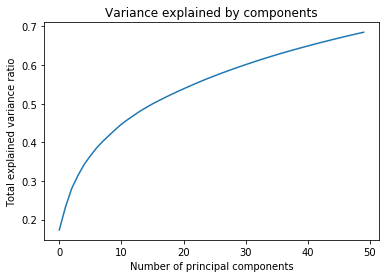

In [13]:
plt.plot(np.cumsum(PCA_DRAGON_VPAS_data_pca_fit_set_1.explained_variance_ratio_))
plt.xlabel('Number of principal components')
plt.ylabel('Total explained variance ratio')
plt.title('Variance explained by components')

plt.savefig('scree_plot.png')

In [14]:
np.sum(PCA_DRAGON_VPAS_data_pca_fit_set_1.explained_variance_ratio_)

0.6849954252076154

In [15]:
DRAGON_VPAS_AdaBoostRegressor_model_set_1

AdaBoostRegressor(base_estimator=ExtraTreesRegressor(bootstrap=False,
                                                     criterion='mse',
                                                     max_depth=None,
                                                     max_features='log2',
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=5,
                                                     n_jobs=None,
                                                     oob_score=False,
                                                  

In [65]:
#pretty_fig_data = DRAGON_VPAS_data_X_train_main_set_1.drop('Unnamed: 0', axis=1, inplace=True)
pretty_fig_data.head()
pretty_fig_features = list(DRAGON_VPAS_importances_model_set_1.nlargest(15).index.values)
pretty_fig_data = pretty_fig_data[pretty_fig_features]
pretty_fig_exp_values = np.array(DRAGON_VPAS_data_y_train_set_1.iloc[:, 0])
model = DRAGON_VPAS_GradientBoostingRegressor_model_set_1
pretty_fig_predictions = model.predict(pretty_fig_data)

In [67]:
@widgets.interact()
def plot_scatter_colour(colour_by = pretty_fig_features,
                        colour_type = ['tab10', 'rainbow']):
    fig = plt.figure(figsize=(10, 7))
    fig = plt.scatter(pretty_fig_exp_values, pretty_fig_predictions,
                      c = pretty_fig_data[colour_by],
                      cmap = colour_type)
    plt.colorbar()
    plt.xlabel('Experimental')
    plt.ylabel('Predicted')
    plt.title('Predited vs experimental $log(K_H)$')
    plt.show()

interactive(children=(Dropdown(description='colour_by', options=('TPSA(NO)', 'P_VSA_p_2', 'Me', 'nHDon', 'F01[…